In [1]:
from scipy import io
import os
import numpy as np
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt
from pathlib import Path

from visualisation import visualise_class
from mpl_toolkits.mplot3d import Axes3D

import sys
sys.path.append('/home/xbankov/neuroscience/')  # Add the directory containing the module to the Python path

from dataset import load_mat, encode_labels, MouseBrainPointCloudDataset

import logging
from pathlib import Path

import numpy as np
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from scipy import io
from sklearn.model_selection import train_test_split, KFold
from torch.utils.data import DataLoader

%matplotlib inline

In [4]:
imgs = io.loadmat("../data/images_natimg2800_all.mat")["imgs"]
labels_mat = io.loadmat("../data/stimuli_class_assignment_confident.mat")
labels_names = np.array([a[0] for a in labels_mat["class_names"].flatten()])
labels_map = np.take(labels_names, labels_mat["class_assignment"]).ravel()

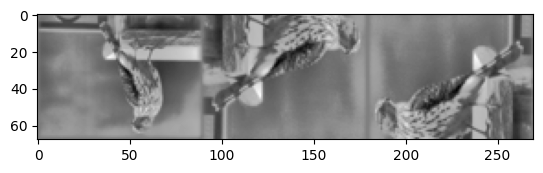

In [5]:
plt.imshow(imgs[:,:,0], cmap="gray")
plt.show()

## Show different classes with their respective images

In [6]:
for class_name in class_names:
    print(class_name)
    if not Path(f"../figures/{class_name}.png").exists:
        visualise_class(imgs, class_name, class_map, save_path = f"../figures/{class_name}.png")

unknown
birds
cats
flowers
hamsters
holes
insects
mice
mushrooms
nests
pellets
snakes


## Visualize neural activity on a random stimuli

In [7]:
path = '../data/natimg2800_M160825_MP027_2016-12-14.mat'
numpy_point_cloud, raw_labels = load_mat(path)

0it [00:00, ?it/s]

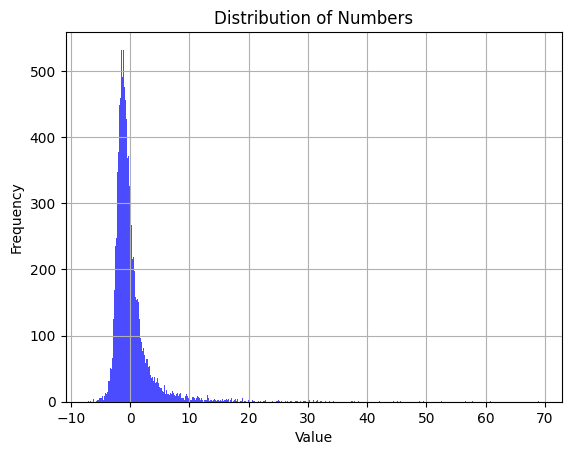

In [15]:
# Create a histogram
plt.hist(numpy_point_cloud[0, :, -1], bins=500, color='blue', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Numbers')
plt.grid(True)

# Show the histogram
plt.show()

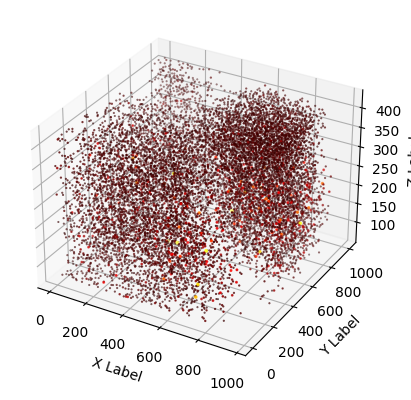

In [18]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = numpy_point_cloud[0, :, 0]
ys = numpy_point_cloud[0, :, 1]
zs = numpy_point_cloud[0, :, 2]
response = numpy_point_cloud[0, :, -1]

ax.scatter(xs, ys, zs, c=response, s=0.05 * (response + abs(response.min())), marker='o', cmap='hot')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()